In [1]:
# pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

## Original data

### EDA

In [2]:
sns.set_theme(style="white")
sns.set_palette("deep")

In [3]:
adult = fetch_ucirepo(id=2) 
x = adult.data.features
y = adult.data.targets
df_adult = pd.concat([x, y], axis=1)  
df_adult.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [4]:
df_adult = df_adult.drop("education-num", axis=1)

In [5]:
df_adult.head()

age         workclass  fnlwgt  education      marital-status  \
0   39         State-gov   77516  Bachelors       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors  Married-civ-spouse   
2   38           Private  215646    HS-grad            Divorced   
3   53           Private  234721       11th  Married-civ-spouse   
4   28           Private  338409  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

In [6]:
df_adult.dropna(inplace=True)

In [7]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   marital-status  47621 non-null  object
 5   occupation      47621 non-null  object
 6   relationship    47621 non-null  object
 7   race            47621 non-null  object
 8   sex             47621 non-null  object
 9   capital-gain    47621 non-null  int64 
 10  capital-loss    47621 non-null  int64 
 11  hours-per-week  47621 non-null  int64 
 12  native-country  47621 non-null  object
 13  income          47621 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.4+ MB


In [8]:
df_adult.describe()

age        fnlwgt  capital-gain  capital-loss  hours-per-week
count  47621.000000  4.762100e+04  47621.000000  47621.000000    47621.000000
mean      38.640684  1.897271e+05   1091.137649     87.853489       40.600050
std       13.558961  1.055695e+05   7487.228336    404.010612       12.260345
min       17.000000  1.228500e+04      0.000000      0.000000        1.000000
25%       28.000000  1.175840e+05      0.000000      0.000000       40.000000
50%       37.000000  1.782820e+05      0.000000      0.000000       40.000000
75%       48.000000  2.377200e+05      0.000000      0.000000       45.000000
max       90.000000  1.490400e+06  99999.000000   4356.000000       99.000000

In [9]:
df_adult.duplicated().sum()

29

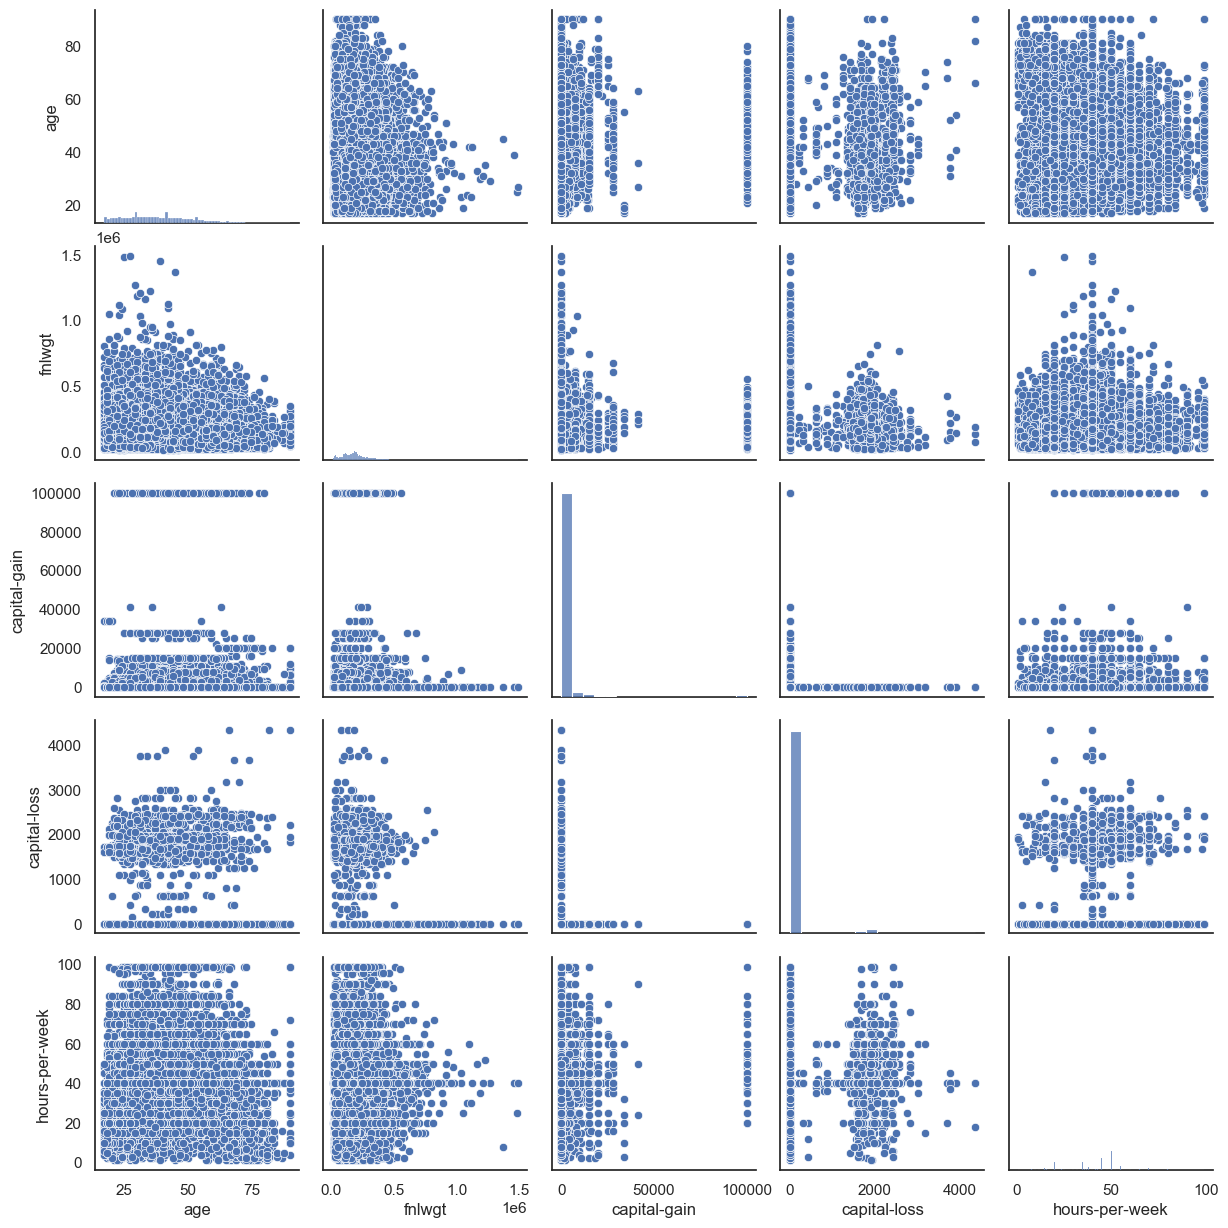

In [10]:
sns.pairplot(data=df_adult)

In [11]:
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [12]:
for el in df_adult.columns:
    print(f"{el}: {df_adult[el].unique().shape[0]}")

age: 74
workclass: 9
fnlwgt: 27946
education: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
capital-gain: 122
capital-loss: 98
hours-per-week: 96
native-country: 42
income: 4


In [13]:
cat_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
non_cat_col = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [14]:
col_num = 3
rows_number = int(len(non_cat_col)/col_num)+1

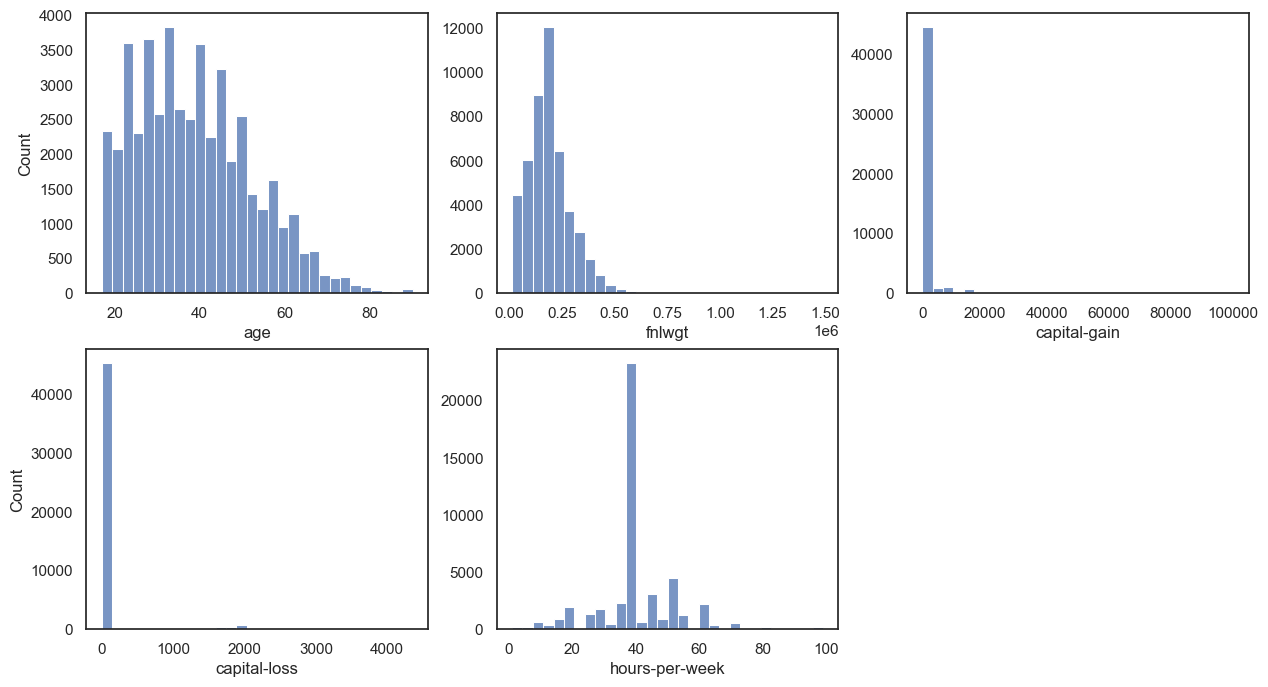

In [15]:
fig, ax = plt.subplots(rows_number, col_num, figsize=(col_num*5, rows_number*4))
for i in range(len(non_cat_col), rows_number*col_num):
    fig.delaxes(ax[rows_number-1, i%col_num])
for i in range(len(non_cat_col)):
    sns.histplot(df_adult[non_cat_col[i]], ax=ax[int(i/col_num),i%col_num], bins=30)
    if i % col_num != 0:  # If not the first column in the row, remove y-axis labels
        ax[int(i/col_num),i%col_num].set_ylabel("")
plt.show()

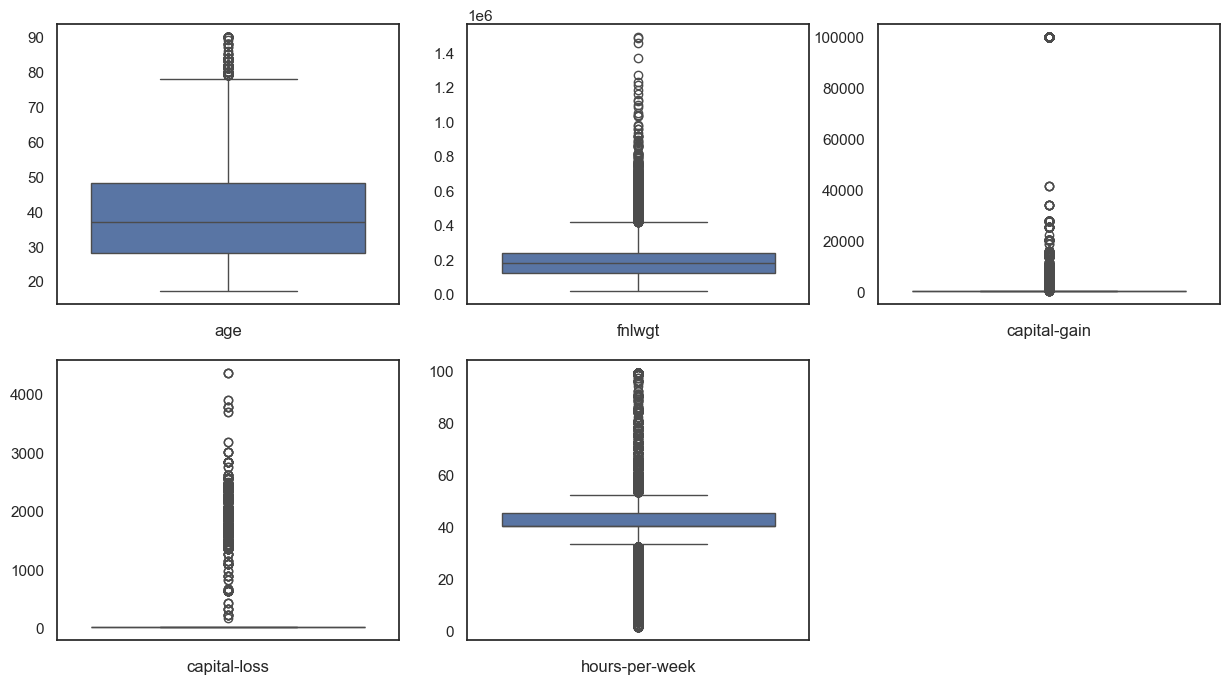

In [16]:
fig, ax = plt.subplots(rows_number, col_num, figsize=(col_num*5, rows_number*4))
for i in range(len(non_cat_col), rows_number*col_num):
    fig.delaxes(ax[rows_number-1, i%col_num])
for i in range(len(non_cat_col)):
    sns.boxplot(df_adult[non_cat_col[i]], ax=ax[int(i/col_num),i%col_num])
    ax[int(i/col_num),i%col_num].set_xlabel(non_cat_col[i])
    ax[int(i/col_num),i%col_num].set_ylabel("")
plt.show()

<Axes: xlabel='fnlwgt', ylabel='Count'>

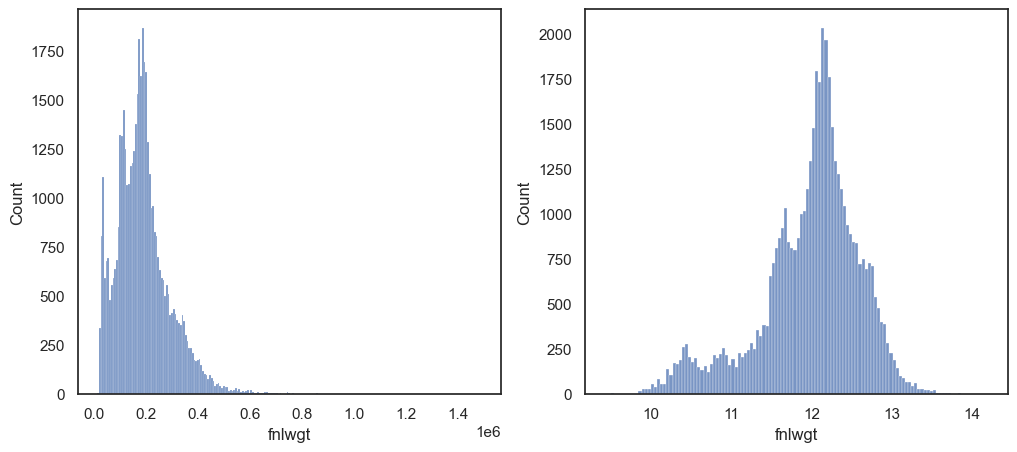

In [17]:
col = "fnlwgt"
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_adult[col], ax=ax[0])
sns.histplot(np.log(df_adult[col]), ax=ax[1])

In [18]:
mode_value = df_adult["capital-gain"].mode().iloc[0]
mode_value

0

<Axes: xlabel='capital-gain', ylabel='Count'>

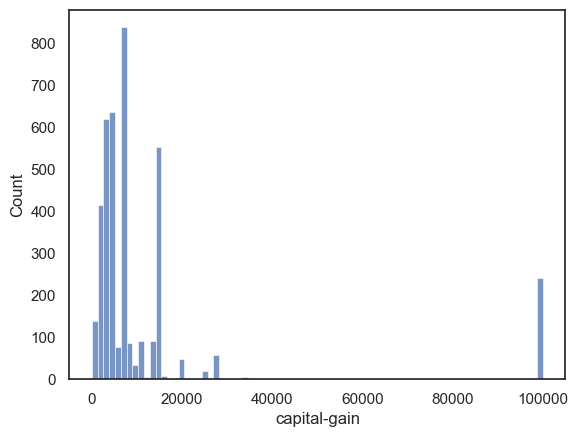

In [19]:
sns.histplot(df_adult["capital-gain"].where(df_adult["capital-gain"]!=mode_value))

In [20]:
df_adult_enc = df_adult.copy()
for el in cat_col:
    if el in df_adult.select_dtypes(include=['object', 'category']):
        df_adult_enc[el] = df_adult[el].astype('category').cat.codes.replace(-1, np.nan)

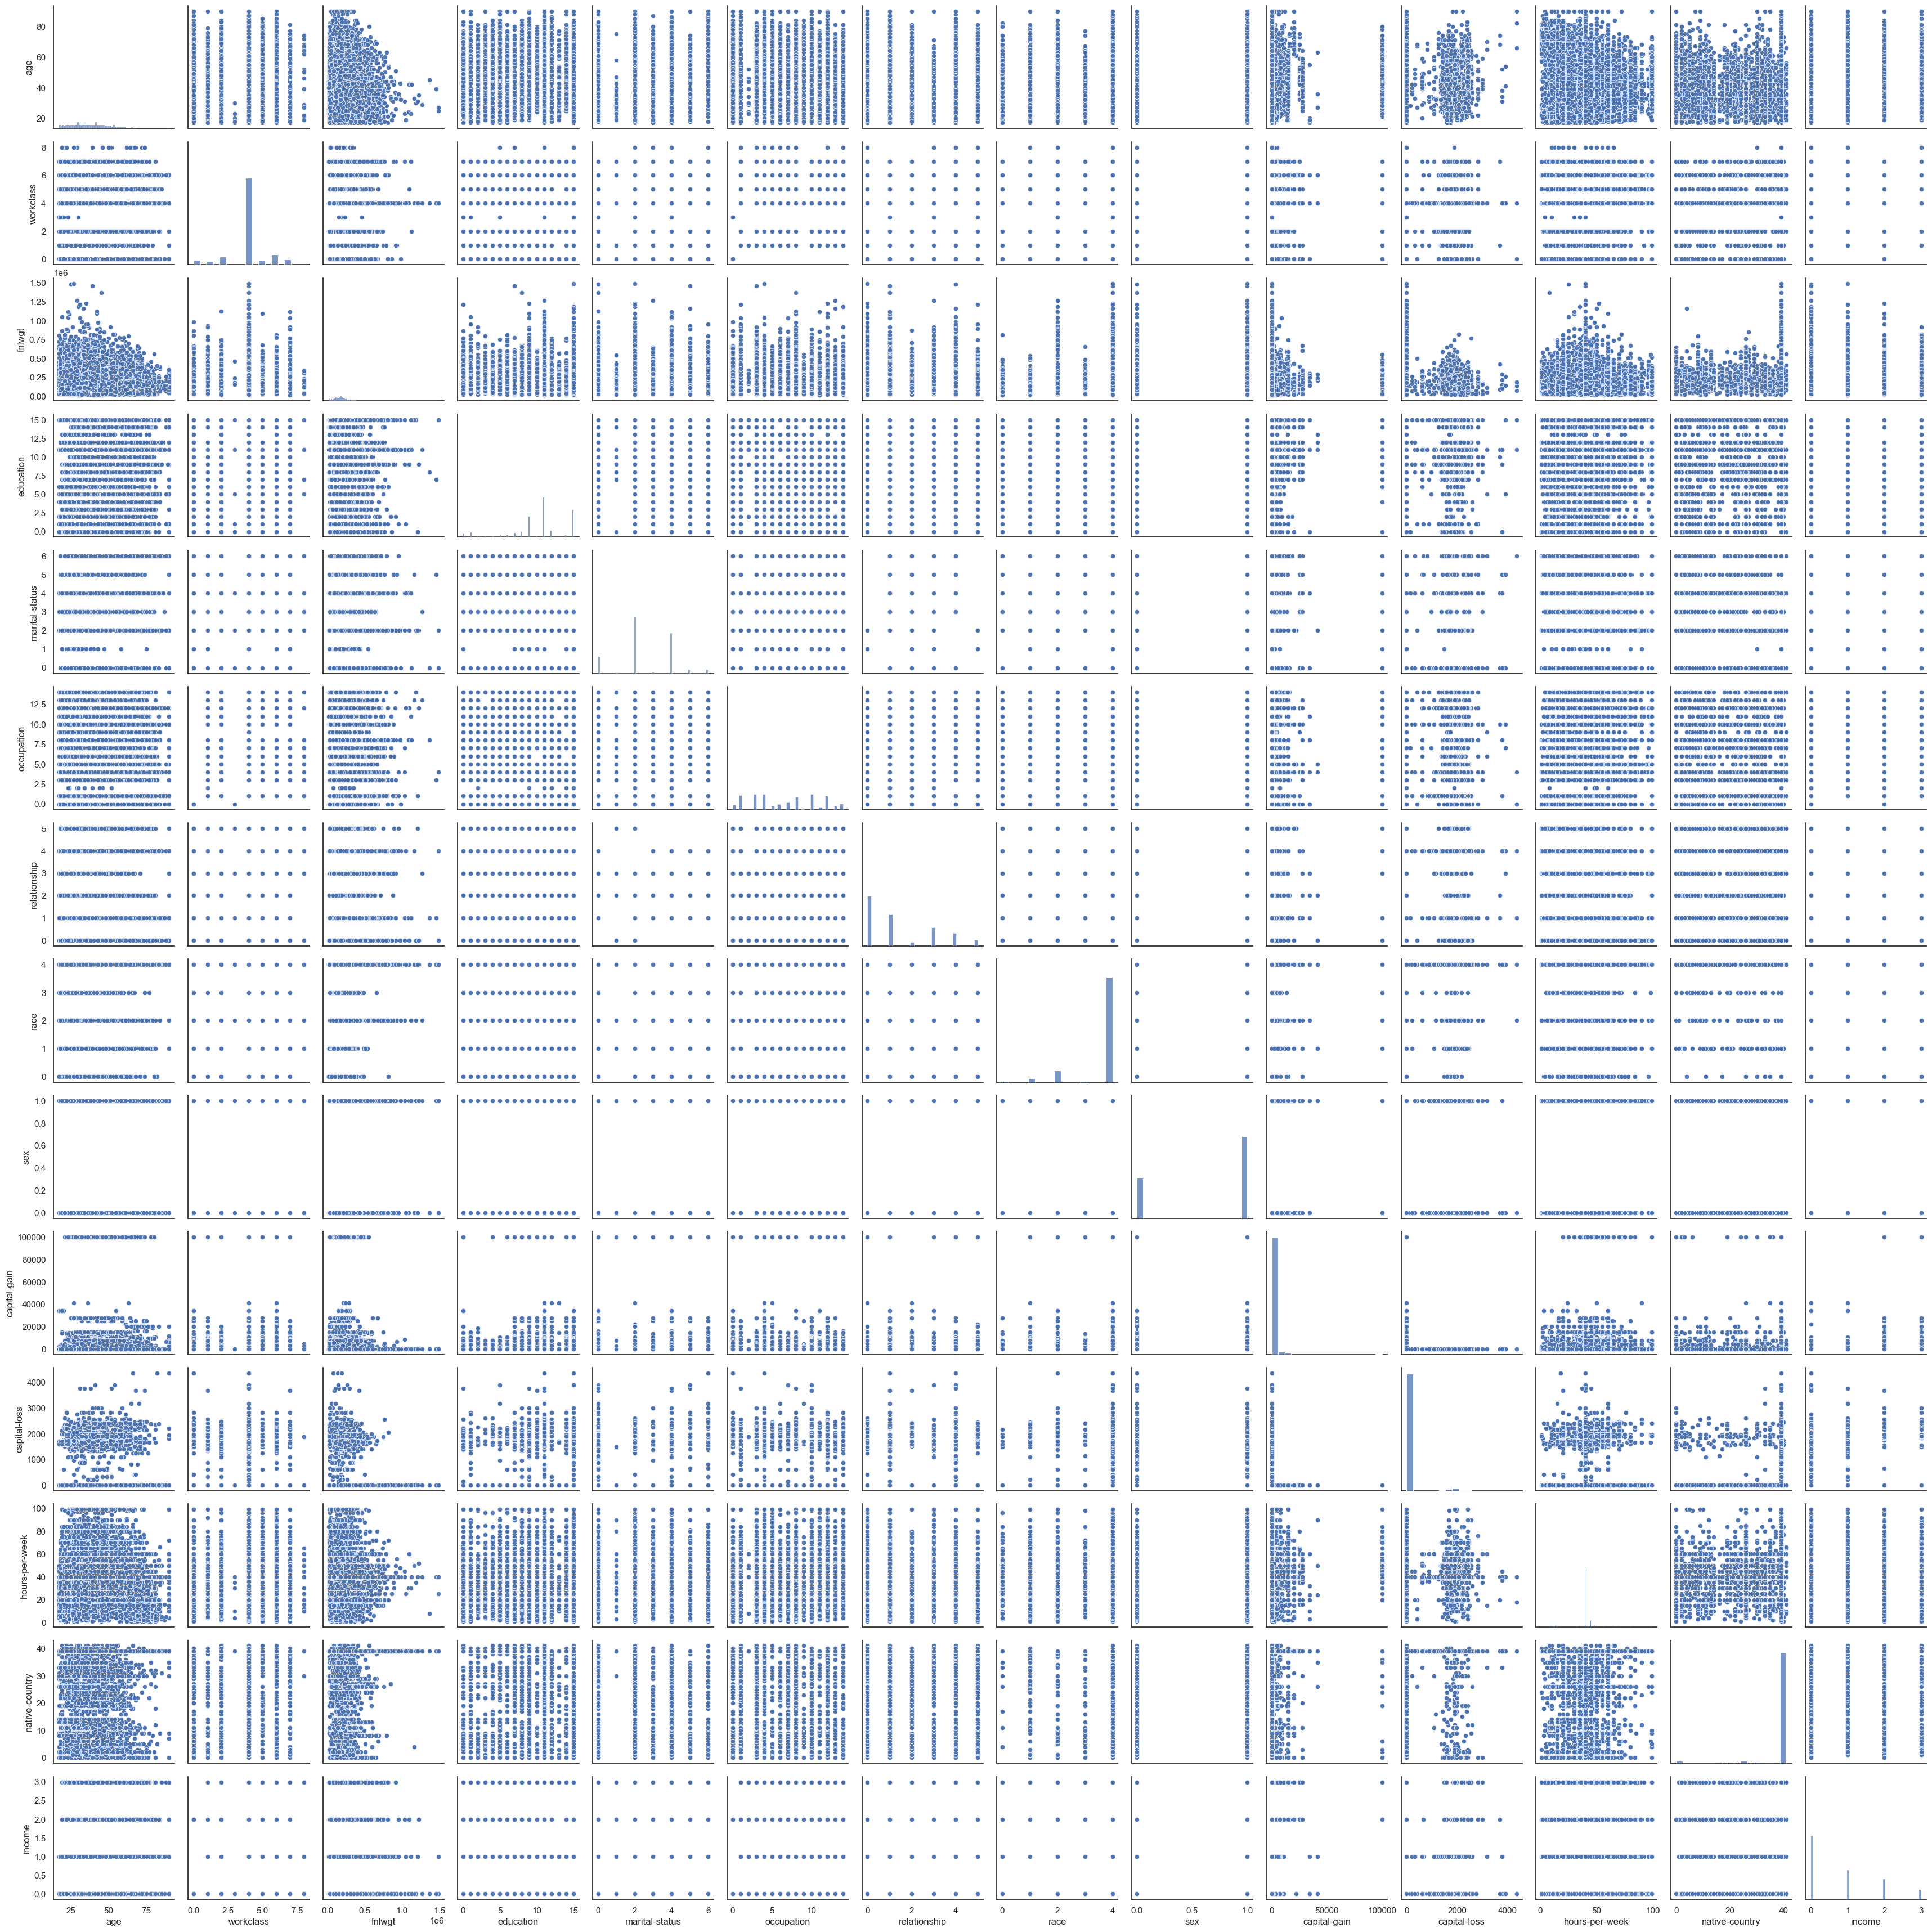

In [21]:
sns.pairplot(data=df_adult_enc)

<Axes: >

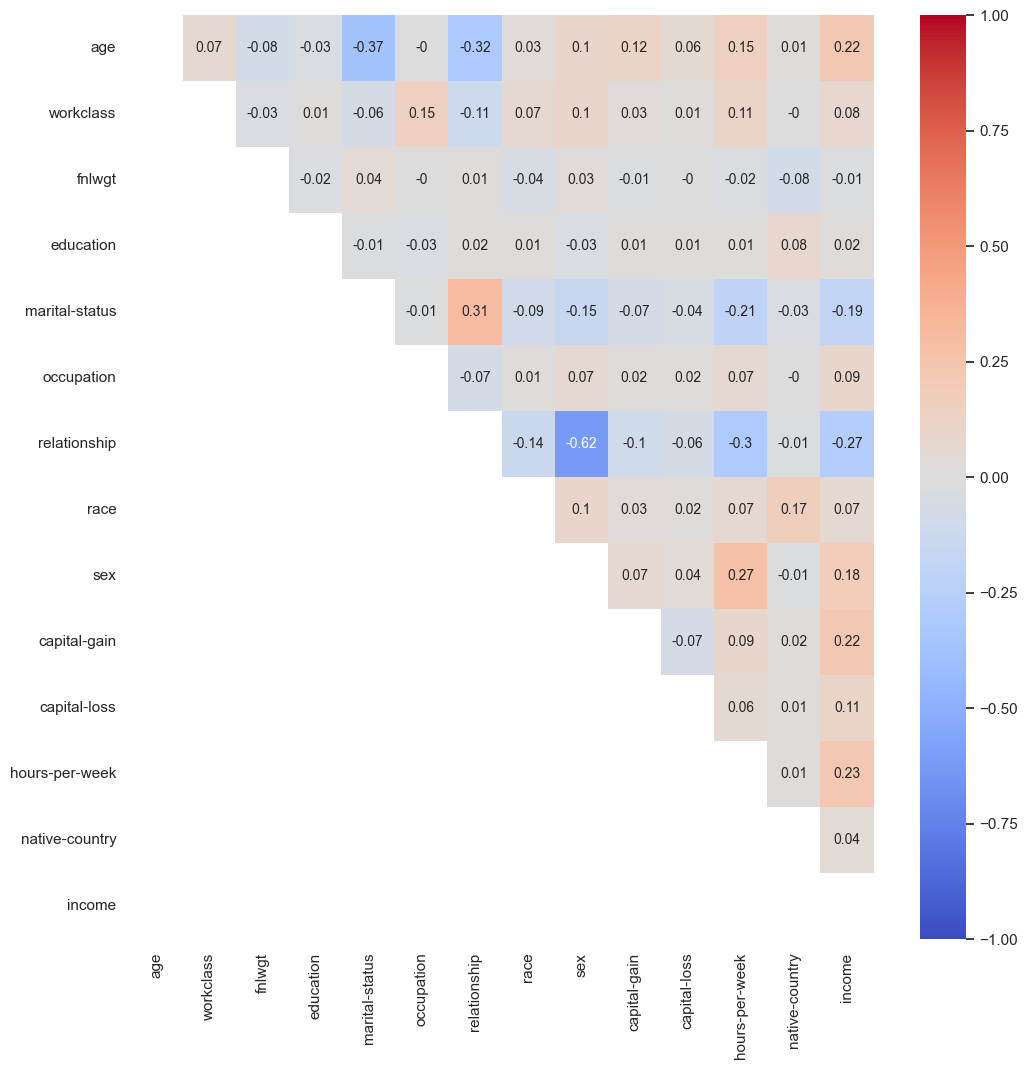

In [22]:
plt.figure(figsize = (12,12))
sns.heatmap(round(df_adult_enc.corr(method = 'spearman'),2), mask = np.tril(df_adult_enc.corr(method = 'spearman')), vmax=1, vmin=-1, 
            center=0,cmap='coolwarm', annot=True, annot_kws={"size": 10})

<Axes: xlabel='age', ylabel='Percent'>

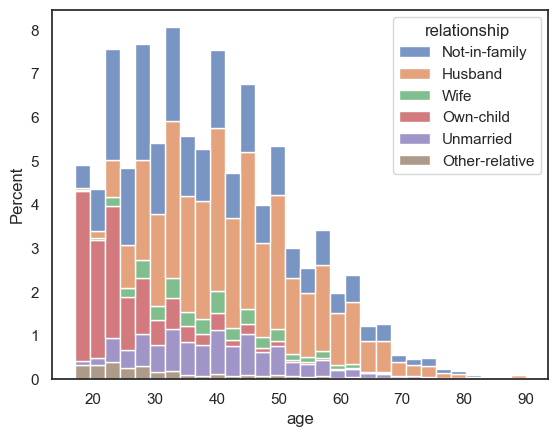

In [23]:
sns.histplot(data=df_adult, x="age", hue="relationship", multiple="stack", stat="percent", palette="deep", bins=30)

In [24]:
df_adult["relationship"].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [25]:
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

### DT feature importances

In [26]:
model = tree.DecisionTreeClassifier(random_state=42)
indep_col = ['age', 'workclass', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
dep_col = 'income'

x_train = df_adult_enc.loc[:, indep_col]
y_train = df_adult_enc[[dep_col]]
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# feature importance
dict(zip(indep_col, model.feature_importances_))

{'age': 0.16158314751384725,
 'workclass': 0.04447735614359503,
 'fnlwgt': 0.3105781700002395,
 'education': 0.06863872956764402,
 'marital-status': 0.019330089160439278,
 'occupation': 0.08865074258506393,
 'relationship': 0.08305276668689676,
 'race': 0.021814852015870495,
 'sex': 0.011228681264471204,
 'capital-gain': 0.05274941349557851,
 'capital-loss': 0.022667431772002325,
 'hours-per-week': 0.09144434214178931,
 'native-country': 0.023784277652562164}

### Constraints & Conditions

In [28]:
# class balance
for el in cat_col:
    print(df_adult[[el]].value_counts()/len(df_adult))

workclass       
Private             0.708028
Self-emp-not-inc    0.080595
Local-gov           0.065643
State-gov           0.041263
?                   0.038554
Self-emp-inc        0.035447
Federal-gov         0.029882
Without-pay         0.000441
Never-worked        0.000147
Name: count, dtype: float64
education   
HS-grad         0.324311
Some-college    0.220743
Bachelors       0.165494
Masters         0.054808
Assoc-voc       0.042712
11th            0.036664
Assoc-acdm      0.032885
10th            0.028055
7th-8th         0.019151
Prof-school     0.017198
9th             0.015434
12th            0.013292
Doctorate       0.012221
5th-6th         0.010374
1st-4th         0.005019
Preschool       0.001638
Name: count, dtype: float64
marital-status       
Married-civ-spouse       0.461267
Never-married            0.326642
Divorced                 0.137040
Separated                0.031436
Widowed                  0.030302
Married-spouse-absent    0.012599
Married-AF-spouse        0.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, '?'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

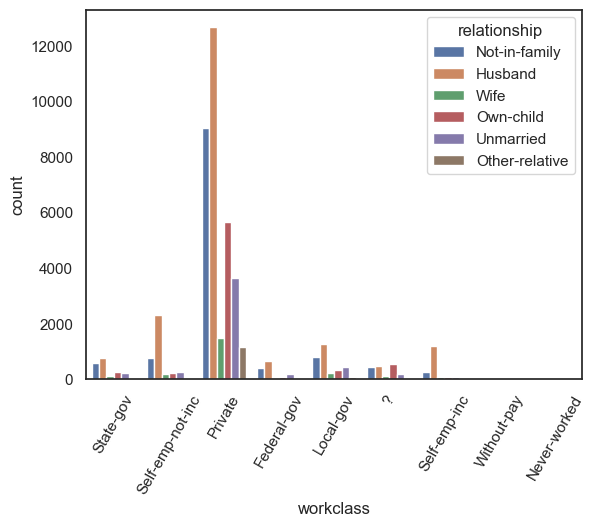

In [29]:
# condition
sns.countplot(data=df_adult, x="workclass", hue="relationship", palette="deep")
plt.xticks(rotation=60)

In [30]:
indicator = (df_adult["workclass"] == "Private") & (df_adult["relationship"] == "Wife")
count = indicator.sum()
count/len(df_adult)

0.030910732659960943

### Model parameters

In [31]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
general_cols = ['age']
continuous_cols = ['fnlwgt']
mixed_cols = ['capital-gain','capital-loss','hours-per-week']
components_numbers = {'fnlwgt': 7,'capital-gain': 12, 'capital-loss': 2, 'hours-per-week':15}
mixed_modes = {'capital-gain': [0], 'capital-loss': [0],'hours-per-week': [40]}
log_transf = ['age','fnlwgt']

class_balance = {"race": [0.6,0.2,0.1,0.05,0.05]} # constraint
condition_list = [{"col1":"workclass", "cat1": "Private", "col2": "relationship", "cat2": "Wife"}]
cond_ratio = 0.2

target_col = "income"
data_name = "adult"
task = "class"

## Generated data

### EDA

In [32]:
df_adult_fake = pd.read_csv("..\\..\\results\\adult\\synth_data\\constr_loss.csv",sep=',')
df_adult_fake.head()

age  workclass  fnlwgt     education      marital-status  \
0   44    Private   34030          11th  Married-civ-spouse   
1   35    Private  112117  Some-college  Married-civ-spouse   
2   58    Private  146540     Doctorate  Married-civ-spouse   
3   61  Local-gov  236210  Some-college           Separated   
4   22    Private  351693  Some-college       Never-married   

          occupation   relationship   race     sex  capital-gain  \
0    Exec-managerial        Husband  White    Male             0   
1  Handlers-cleaners        Husband  White    Male             0   
2  Handlers-cleaners        Husband  White    Male             0   
3     Prof-specialty  Not-in-family  White  Female             0   
4       Craft-repair  Not-in-family  White    Male             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              40  United-States  <=50K  
2             0              40  United-States   >50K  
3             0              45  United-States  <=50K  
4             0              32  United-States  <=50K

In [33]:
df_adult_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2000 non-null   int64 
 1   workclass       2000 non-null   object
 2   fnlwgt          2000 non-null   int64 
 3   education       2000 non-null   object
 4   marital-status  2000 non-null   object
 5   occupation      2000 non-null   object
 6   relationship    2000 non-null   object
 7   race            2000 non-null   object
 8   sex             2000 non-null   object
 9   capital-gain    2000 non-null   int64 
 10  capital-loss    2000 non-null   int64 
 11  hours-per-week  2000 non-null   int64 
 12  native-country  2000 non-null   object
 13  income          2000 non-null   object
dtypes: int64(5), object(9)
memory usage: 218.9+ KB


In [34]:
df_adult_fake.describe()

age       fnlwgt  capital-gain  capital-loss  hours-per-week
count  2000.000000     2000.000   2000.000000   2000.000000     2000.000000
mean     39.336500   225265.372    799.834000    109.763500       42.529500
std      14.848283   121990.807   3204.727105    447.162515       15.478434
min      17.000000    27504.000      0.000000      0.000000        6.000000
25%      27.000000   133633.500      0.000000      0.000000       40.000000
50%      37.000000   208478.500      0.000000      0.000000       40.000000
75%      49.000000   287106.750      0.000000      0.000000       50.000000
max      85.000000  1183514.000  17159.000000   2173.000000       99.000000

In [35]:
df_adult_fake.duplicated().sum()

0

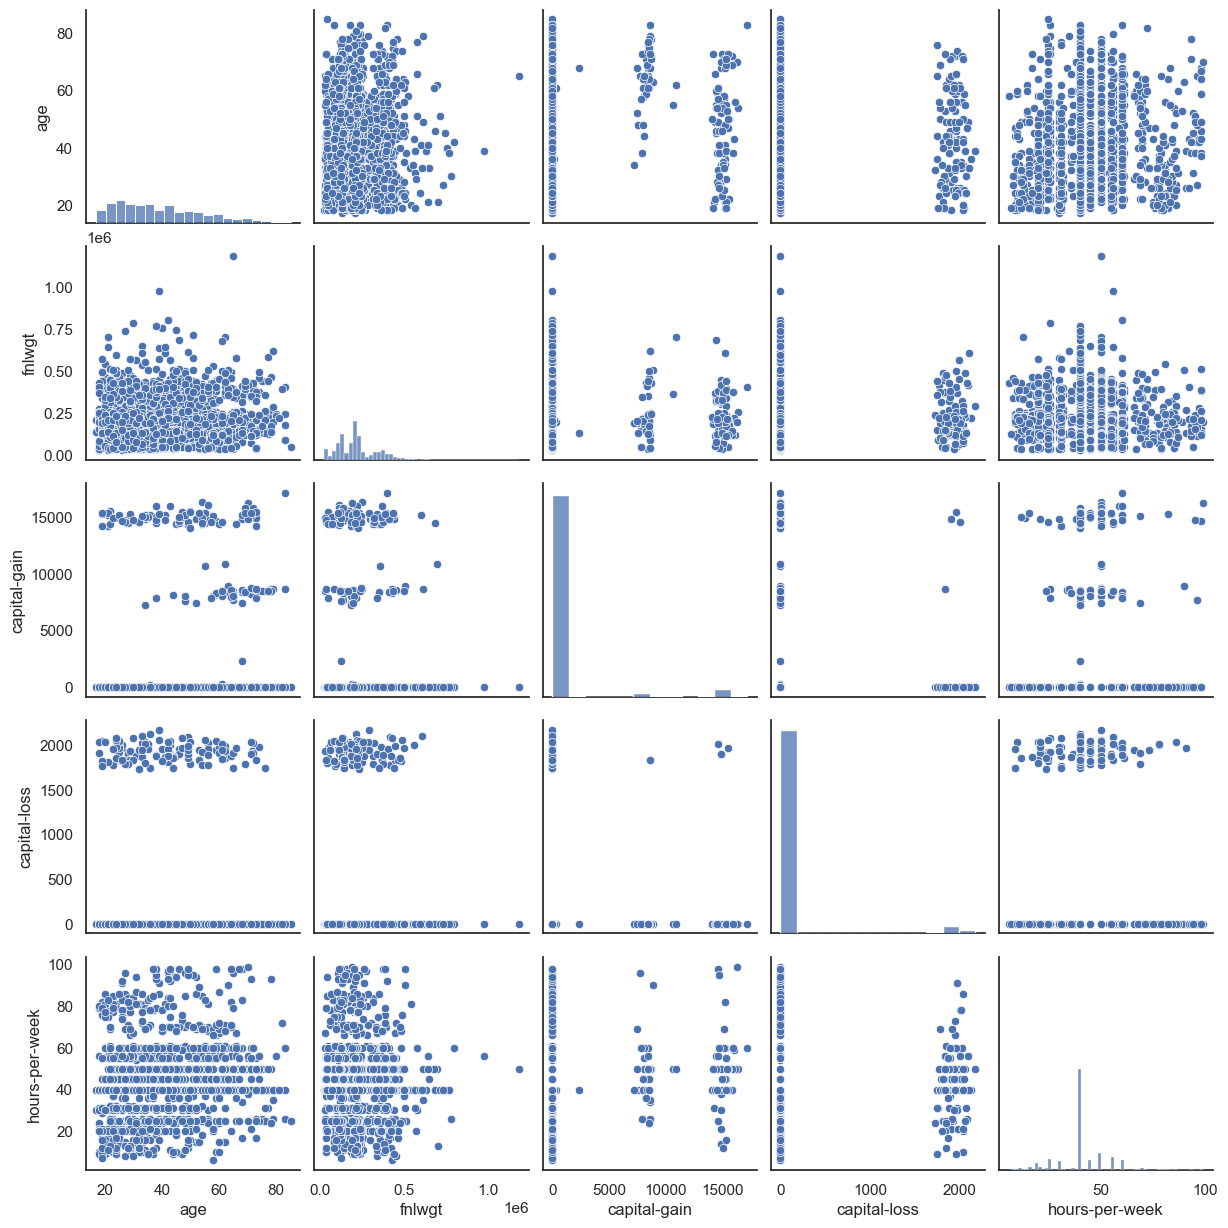

In [36]:
sns.pairplot(data=df_adult_fake)

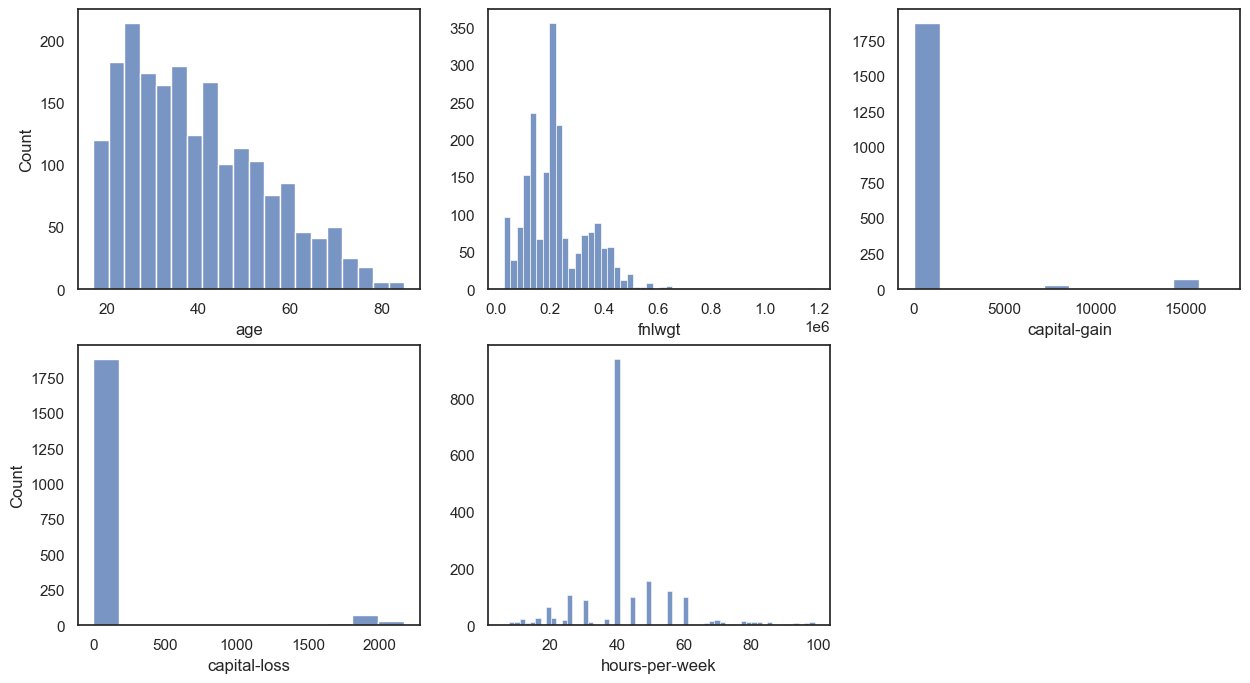

In [37]:
fig, ax = plt.subplots(rows_number, col_num, figsize=(col_num*5, rows_number*4))
for i in range(len(non_cat_col), rows_number*col_num):
    fig.delaxes(ax[rows_number-1, i%col_num])
for i in range(len(non_cat_col)):
    sns.histplot(df_adult_fake[non_cat_col[i]], ax=ax[int(i/col_num),i%col_num])
    if i % col_num != 0:  # If not the first column in the row, remove y-axis labels
        ax[int(i/col_num),i%col_num].set_ylabel("")
plt.show()

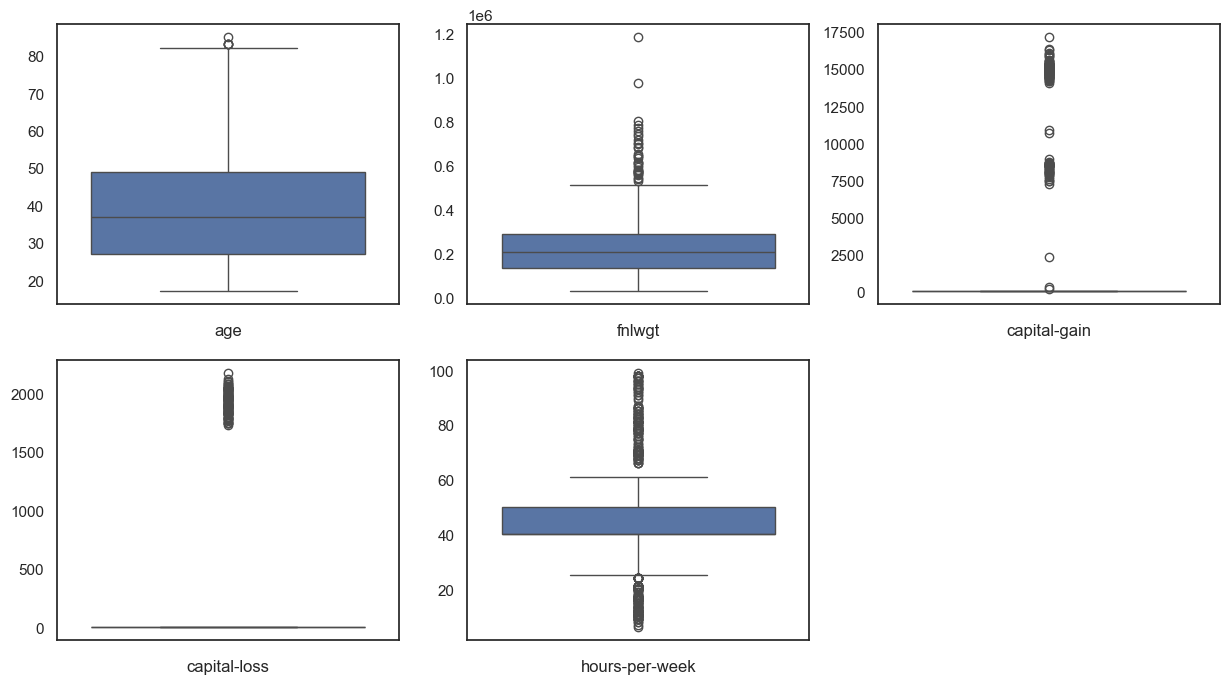

In [38]:
fig, ax = plt.subplots(rows_number, col_num, figsize=(col_num*5, rows_number*4))
for i in range(len(non_cat_col), rows_number*col_num):
    fig.delaxes(ax[rows_number-1, i%col_num])
for i in range(len(non_cat_col)):
    sns.boxplot(df_adult_fake[non_cat_col[i]], ax=ax[int(i/col_num),i%col_num])
    ax[int(i/col_num),i%col_num].set_xlabel(non_cat_col[i])
    ax[int(i/col_num),i%col_num].set_ylabel("")
plt.show()

<Axes: xlabel='fnlwgt', ylabel='Count'>

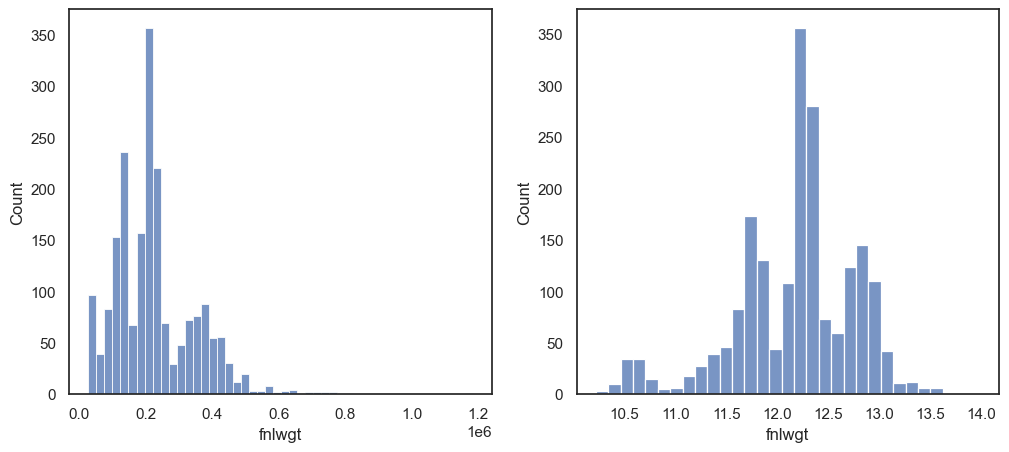

In [39]:
col = "fnlwgt"
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_adult_fake[col], ax=ax[0])
sns.histplot(np.log(df_adult_fake[col]), ax=ax[1])

In [40]:
df_adult_fake_enc = df_adult_fake.copy()
for el in cat_col:
    if el in df_adult_fake.select_dtypes(include=['object', 'category']):
        df_adult_fake_enc[el] = df_adult_fake[el].astype('category').cat.codes.replace(-1, np.nan)

<Axes: >

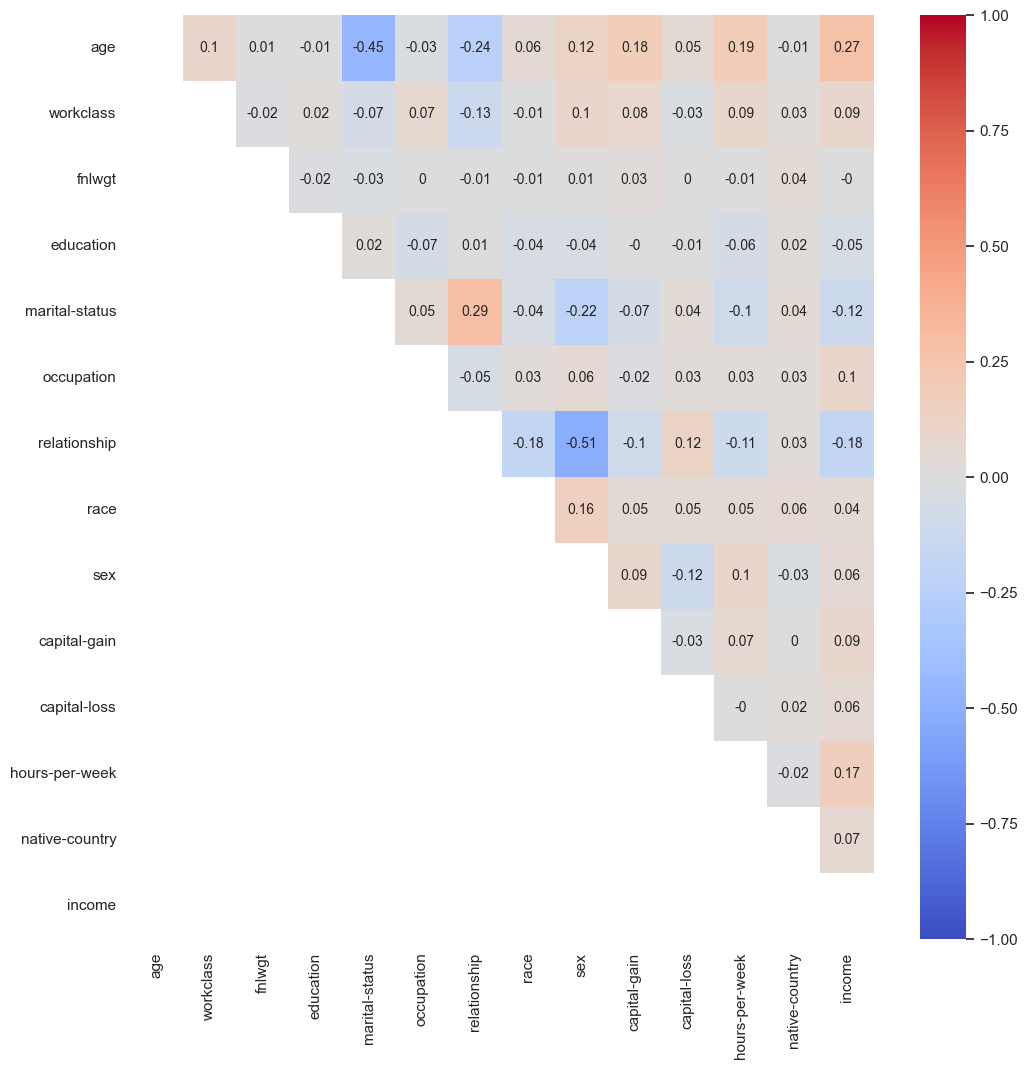

In [41]:
plt.figure(figsize = (12,12))
sns.heatmap(round(df_adult_fake_enc.corr(method = 'spearman'),2), mask = np.tril(df_adult_fake_enc.corr(method = 'spearman')), vmax=1, vmin=-1, 
            center=0,cmap='coolwarm', annot=True, annot_kws={"size": 10})

<Axes: xlabel='age', ylabel='Percent'>

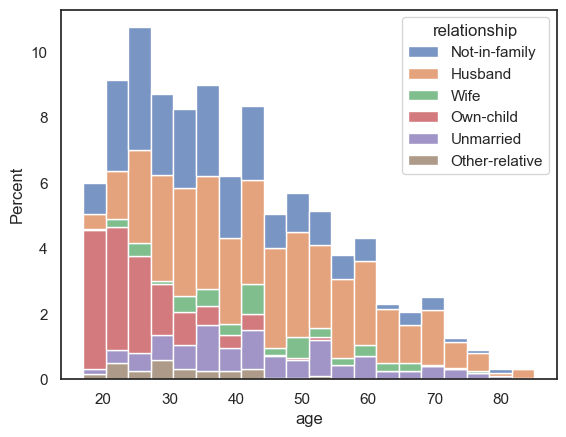

In [42]:
sns.histplot(data=df_adult_fake, x="age", hue="relationship", multiple="stack", stat="percent", palette="deep", hue_order=df_adult["relationship"].unique())

### Constraints & Conditions

In [43]:
# class balance
for el in cat_col:
    print(df_adult_fake[[el]].value_counts()/len(df_adult_fake))

workclass       
Private             0.7015
Self-emp-not-inc    0.0740
Local-gov           0.0705
?                   0.0530
State-gov           0.0410
Self-emp-inc        0.0315
Federal-gov         0.0285
Name: count, dtype: float64
education   
HS-grad         0.3255
Some-college    0.2135
Bachelors       0.1800
Masters         0.0620
Assoc-voc       0.0435
11th            0.0335
10th            0.0290
Assoc-acdm      0.0250
7th-8th         0.0170
9th             0.0160
Prof-school     0.0150
5th-6th         0.0110
12th            0.0105
Doctorate       0.0105
1st-4th         0.0070
Preschool       0.0010
Name: count, dtype: float64
marital-status       
Married-civ-spouse       0.4535
Never-married            0.3475
Divorced                 0.1300
Separated                0.0300
Widowed                  0.0250
Married-spouse-absent    0.0140
Name: count, dtype: float64
occupation       
Adm-clerical         0.1320
Prof-specialty       0.1225
Craft-repair         0.1205
Exec-manageri

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Local-gov'),
  Text(2, 0, '?'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Self-emp-not-inc'),
  Text(5, 0, 'State-gov'),
  Text(6, 0, 'Self-emp-inc')])

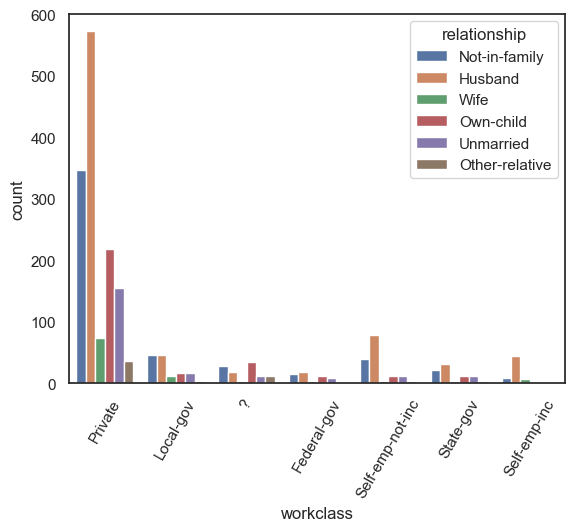

In [44]:
# condition
sns.countplot(data=df_adult_fake, x="workclass", hue="relationship", palette="deep", hue_order=df_adult["relationship"].unique())
plt.xticks(rotation=60)

In [45]:
indicator = (df_adult_fake["workclass"] == "Private") & (df_adult_fake["relationship"] == "Wife")
count = indicator.sum()
count/len(df_adult_fake)

0.037

## Merged

In [46]:
df_adult_m = df_adult.copy()
df_adult_fake_m = df_adult_fake.copy()

In [47]:
df_adult_m = df_adult_m.sample(len(df_adult_fake_m))

In [48]:
df_adult_m["data"] = "real"
df_adult_fake_m["data"] = "fake"

In [49]:
df_merged = pd.concat([df_adult_m,  df_adult_fake_m],ignore_index=True)

In [50]:
df_merged.duplicated().sum()

0

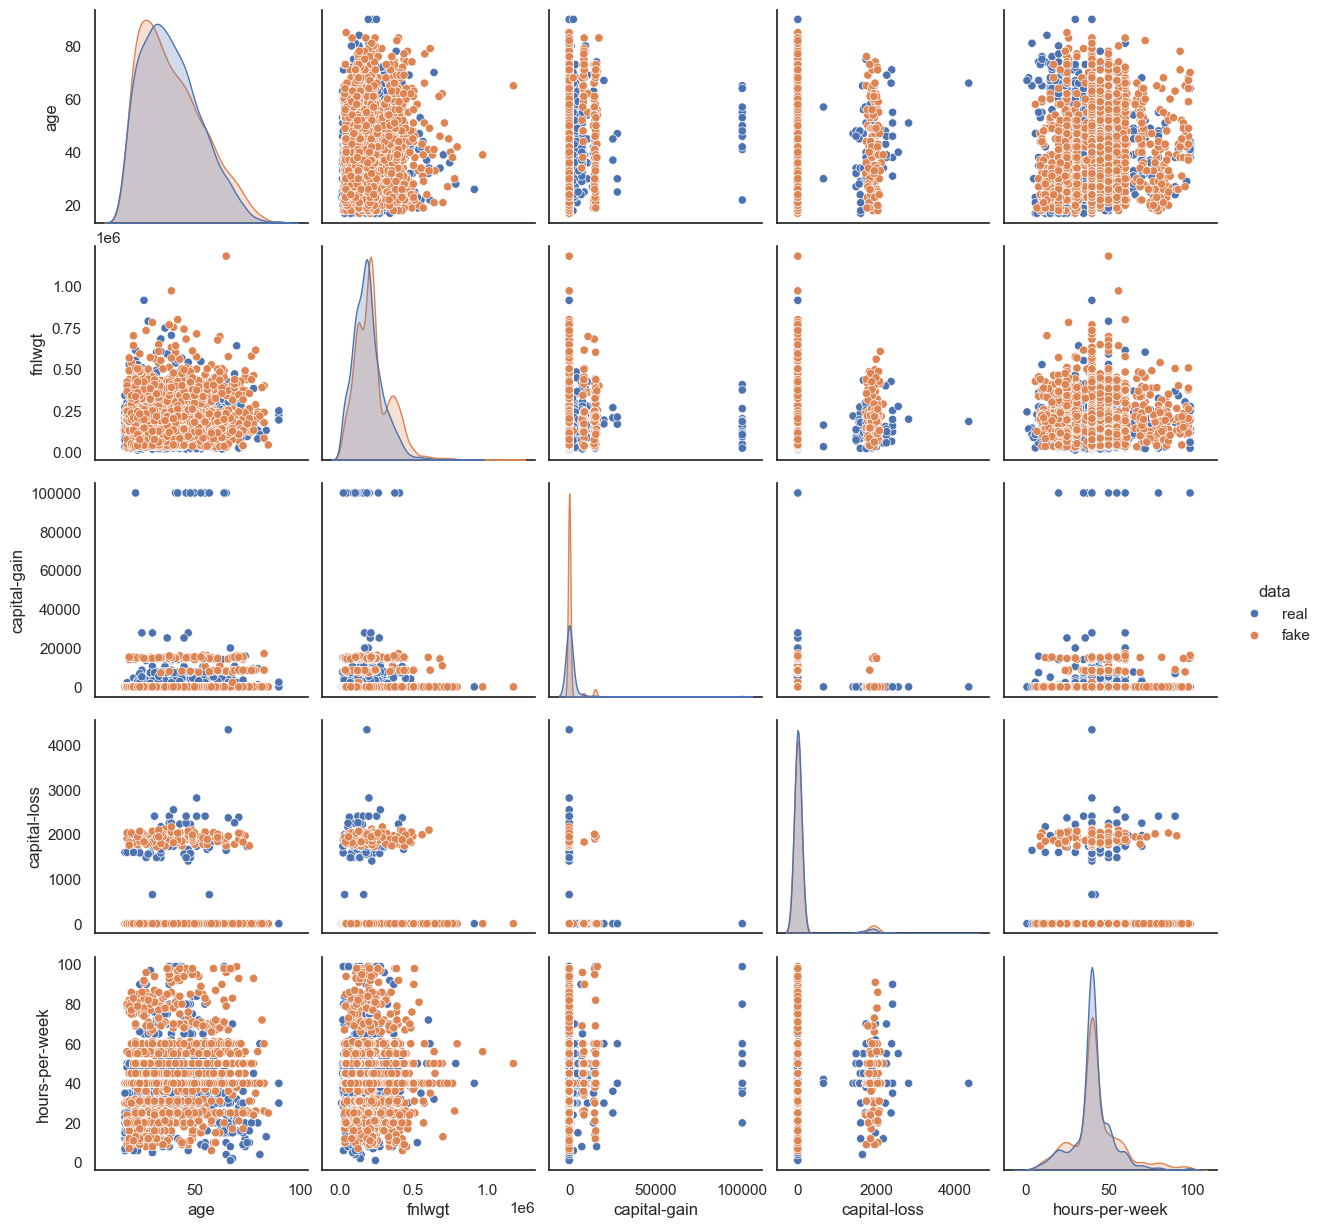

In [51]:
sns.pairplot(df_merged, hue="data")

In [52]:
!jupyter nbconvert --to html --no-input adult.ipynb

[NbConvertApp] Converting notebook adult.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 18 image(s).
[NbConvertApp] Writing 5066989 bytes to adult.html
